#Loading Libraries



In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

#Loading Dataset


In [ ]:
filepath="/content/drive/MyDrive/Covid-Data.csv"
dataset=pd.read_csv(filepath)
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99140,ZWE,Africa,Zimbabwe,2021-06-25,45217.0,911.0,554.571,1721.0,12.0,9.286,3042.268,61.293,37.312,115.791,0.807,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1221917.0,737483.0,484434.0,28602.0,12931.0,8.22,4.96,3.26,870.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
99141,ZWE,Africa,Zimbabwe,2021-06-26,46018.0,801.0,627.143,1725.0,4.0,8.429,3096.160,53.892,42.195,116.061,0.269,0.567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1249508.0,747330.0,502178.0,27591.0,16513.0,8.41,5.03,3.38,1111.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
99142,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,3124.687,28.527,44.819,116.801,0.740,0.615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1275259.0,756291.0,518968.0,25751.0,19504.0,8.58,5.09,3.49,1312.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
99143,ZWE,Africa,Zimba

#EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99145 entries, 0 to 99144
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               99145 non-null  object 
 1   continent                              94494 non-null  object 
 2   location                               99145 non-null  object 
 3   date                                   99145 non-null  object 
 4   total_cases                            95579 non-null  float64
 5   new_cases                              95576 non-null  float64
 6   new_cases_smoothed                     94566 non-null  float64
 7   total_deaths                           85461 non-null  float64
 8   new_deaths                             85617 non-null  float64
 9   new_deaths_smoothed                    94566 non-null  float64
 10  total_cases_per_million                95070 non-null  float64
 11  ne

In [ ]:
dataset.nunique() 

iso_code                                   230
continent                                    6
location                                   230
date                                       547
total_cases                              52851
new_cases                                12829
new_cases_smoothed                       24767
total_deaths                             20324
new_deaths                                3032
new_deaths_smoothed                       6876
total_cases_per_million                  74236
new_cases_per_million                    41562
new_cases_smoothed_per_million           47023
total_deaths_per_million                 46649
new_deaths_per_million                    7822
new_deaths_smoothed_per_million           9234
reproduction_rate                          367
icu_patients                              2585
icu_patients_per_million                  5569
hosp_patients                             5005
hosp_patients_per_million                 9322
weekly_icu_ad

In [ ]:
dataset.describe() 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.557900e+04,95576.000000,94566.000000,8.546100e+04,85617.000000,94566.000000,95070.000000,95067.000000,94062.000000,84965.000000,85121.000000,94062.000000,78887.000000,9946.000000,9946.000000,12355.000000,12355.000000,874.000000,874.000000,1546.000000,1546.000000,4.450100e+04,4.418400e+04,44184.000000,44501.000000,5.174400e+04,51744.000000,48297.000000,47699.000000,1.633200e+04,1.553100e+04,1.267800e+04,1.360900e+04,2.830700e+04,16332.000000,15531.000000,12678.000000,28307.000000,83543.000000,9.850200e+04,92116.000000,88603.000000,87607.000000,88113.000000,88945.000000,60039.000000,88975.000000,91260.000000,69598.000000,68581.000000,44708.000000,81058.000000,94146.000000,89117.000000,3503.000000
mean,1.056048e+06,6037.829005,6067.677730,2.861440e+04,146.614095,132.023355,13007.402373,76.044413,76.382083,288.020553,1.554576,1.398892,1.003592,1065.177559,26.406189,4639.462647,169.653023,275.521073,20.708252,3553.456277,109.255501,4.790192e+04,7.726817e+06,309.569287,2.123176,4.547949e+04,2.036451,0.088687,163.438106,3.067279e+07,1.706875e+07,9.505566e+06,6.732205e+05,3.222951e+05,23.654751,15.539143,9.693850,3228.379447,58.305713,1.248448e+08,386.206438,30.564173,8.790269,5.564903,19286.060201,13.404902,258.455128,7.927231,10.566405,32.692560,50.835035,3.027914,73.237772,0.727374,18.243991
std,7.237252e+06,37795.913279,37561.142021,1.707170e+05,802.068201,745.445563,23953.301356,200.159672,158.850039,521.250185,3.972517,3.038689,0.351959,2893.588369,27.140695,11880.651159,210.724712,569.527207,35.917670,10832.168866,215.426586,1.759419e+05,3.374118e+07,727.664997,5.972499,1.603150e+05,5.074211,0.097167,891.410496,1.620748e+08,9.045527e+07,4.582998e+07,3.173377e+06,2.124218e+06,30.562033,18.370275,13.610862,4451.296909,21.062038,6.803549e+08,1797.923778,9.130949,6.211801,4.237662,19991.025825,19.959752,119.026690,4.147577,10.466084,13.484345,31.759124,2.459011,7.559552,0.150372,36.030922
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.252000e+03,2.000000,7.429000,5.400000e+01,0.000000,0.000000,259.342000,0.211000,1.288000,7.972000,0.000000,0.000000,0.840000,32.000000,4.793000,118.000000,23.609500,10.795500,1.775000,50.500000,9.452250,1.647000e+03,1.596025e+05,14.161250,0.143000,1.727000e+03,0.141000,0.017000,7.700000,1.192848e+05,9.011600e+04,4.976900e+04,4.520000e+03,8.555000e+02

#Initial Observations

In [ ]:
df = dataset[~dataset['continent'].isnull()]
fig=px.line(df, x='date', y='total_cases', title='Total Cases', color='location')
fig.show()

In [ ]:
df = df.sort_values(by = 'total_cases',ascending=False)
print('Top 5 countries affected by COVID-19: ', ', '.join(df['location'].unique()[:5]))
df = df.sort_values(by = 'total_deaths',ascending=False).reset_index()
print(f'Country with highest number of deaths: {df["location"][0]}')
df = df.sort_values(by = 'total_vaccinations',ascending=False).reset_index()
print(f'Country which is most vaccinated: {df["location"][0]}')
df = df.sort_values(by = 'positive_rate',ascending=False)
print(f'Country with highest positive rate: {df["location"][0]}')

Top 5 countries affected by COVID-19:  United States, India, Brazil, France, Russia
Country with highest number of deaths: United States
Country which is most vaccinated: China
Country with highest positive rate: China


#Bar Plot for Total Cases

In [ ]:
fig =px.bar(dataset.sort_values('total_cases', ascending=False).loc[dataset['date']=='2021-06-29'].iloc[4:57,:],x='location',y='total_cases',width=1500,height=1000,color='location')
fig.show()

#Bar Plot for total deaths

In [ ]:
fig =px.bar(dataset.sort_values('total_deaths', ascending=False).loc[dataset['date']=='2021-06-29'].iloc[4:57,:],x='location',y='total_deaths',width=1500,height=1000,color='location')
fig.show()

#Bar Plot for total vaccinations

In [ ]:
fig =px.bar(dataset.sort_values('total_vaccinations', ascending=False).loc[dataset['date']=='2021-06-29'].iloc[4:57,:],x='location',y='total_vaccinations',width=1500,height=1000,color='location')
fig.show()

#Creating Individual Data frames for each Country
#India

In [ ]:
india=dataset.loc[dataset['location']=='India']
india 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41015,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41016,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41017,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41018,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41019,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41527,IND,Asia,India,2021-06-25,30183143.0,48698.0,51371.000,394493.0,1183.0,1336.571,21871.773,35.288,37.225,285.864,0.857,0.969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1735781.0,399568448.0,289.541,1.258,1771536.0,1.284,0.029,34.5,samples tested,306661528.0,253359907.0,53301621.0,6607501.0,5757941.0,22.22,18.36,3.86,4172.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41528,IND,Asia,India,2021-06-26,30233183.0,50040.0,50201.571,395751.0,1258.0,1291.857,21908.034,36.261,36.378,286.775,0.912,0.936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2243444.0,401811892.0,291.167,1.626,1800608.0,1.305,0.028,35.9,samples tested,314841384.0,260253182.0,54588202.0,8179856.0,6276153.0,22.81,18.86,3.96,4548.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
41529,IND,Asia,India,2021-06-27,30279331.0,46148.0,49158.571,396730.0,979.0,1227.857,21941.474,33.440,35.622,287.485,0.709,0.890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2453209.0,404265101.0,292.945,1.778,1892288.0,1.371,0.0

In [ ]:
india['date']=pd.to_datetime(india['date'])
india=india[['date','total_cases']]
india.head()
india=india.rename(columns={'date':'ds','total_cases':'y'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
india 

,ds,y
41015,2020-01-30,1.0
41016,2020-01-31,1.0
41017,2020-02-01,1.0
41018,2020-02-02,2.0
41019,2020-02-03,3.0
...,...,...
41527,2021-06-25,30183143.0
41528,2021-06-26,30233183.0
41529,2021-06-27,30279331.0
41530,2021-06-28,30316897.0


#China

In [ ]:
china=dataset.loc[dataset['location']=='China']
china

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
18636,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,0.381,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18637,CHN,Asia,China,2020-01-23,641.0,93.0,NaN,18.0,1.0,NaN,0.445,0.065,NaN,0.013,0.001,NaN,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18638,CHN,Asia,China,2020-01-24,918.0,277.0,NaN,26.0,8.0,NaN,0.638,0.192,NaN,0.018,0.006,NaN,3.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18639,CHN,Asia,China,2020-01-25,1401.0,483.0,NaN,42.0,16.0,NaN,0.973,0.336,NaN,0.029,0.011,NaN,3.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.69,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
18640,CHN,Asia,China,2020-01-26,2067.0,666.0,NaN,56.0,14.0,NaN,1.436,0.463,NaN,0.039,0.010,NaN,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,CHN,Asia,China,2021-06-25,91771.0,25.0,22.000,4636.0,0.0,0.0,63.760,0.017,0.015,3.221,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.143805e+09,NaN,NaN,23162000.0,21935429.0,79.47,NaN,NaN,15240.0,74.54,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
19157,CHN,Asia,China,2021-06-26,91785.0,14.0,20.714,4636.0,0.0,0.0,63.770,0.010,0.014,3.221,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165230e+09,NaN,NaN,21425000.0,22105857.0,80.96,NaN,NaN,15359.0,74.54,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
19158,CHN,Asia,China,2021-06-27,91807.0,22.0,21.429,4636.0,0.0,0.0,63.785,0.015,0.015,3.221,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.185787e+09,NaN,NaN,20557000.0,22366286.0,82.39,NaN,NaN,15539.0,74.54,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN
1915

In [ ]:
china['date']=pd.to_datetime(china['date'])
china=china[['date','total_cases']]
china.head()
china=china.rename(columns={'date':'ds','total_cases':'y'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
china

,ds,y
18636,2020-01-22,548.0
18637,2020-01-23,641.0
18638,2020-01-24,918.0
18639,2020-01-25,1401.0
18640,2020-01-26,2067.0
...,...,...
19156,2021-06-25,91771.0
19157,2021-06-26,91785.0
19158,2021-06-27,91807.0
19159,2021-06-28,91825.0


#Canada

In [ ]:
canada=dataset.loc[dataset['location']=='Canada']
canada 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
16030,CAN,North America,Canada,2020-01-26,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,3.95
16031,CAN,North America,Canada,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN
16032,CAN,North America,Canada,2020-01-28,2.0,1.0,NaN,NaN,NaN,NaN,0.053,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN
16033,CAN,North America,Canada,2020-01-29,2.0,0.0,NaN,NaN,NaN,NaN,0.053,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN
16034,CAN,North America,Canada,2020-01-30,2.0,0.0,NaN,NaN,NaN,NaN,0.053,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,CAN,North America,Canada,2021-06-25,1419804.0,606.0,714.143,26174.0,12.0,22.571,37618.518,16.056,18.922,693.495,0.318,0.598,NaN,478.0,12.665,978.0,25.913,NaN,NaN,NaN,NaN,68938.0,36484663.0,966.682,1.827,61708.0,1.635,0.012,86.4,tests performed,34694975.0,25440005.0,9254970.0,520404.0,468233.0,91.93,67.40,24.52,12406.0,69.91,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN
16547,CAN,North America,Canada,2021-06-26,1420258.0,454.0,663.429,26184.0,10.0,20.286,37630.547,12.029,17.578,693.760,0.265,0.537,NaN,477.0,12.638,967.0,25.621,NaN,NaN,NaN,NaN,42381.0,36527044.0,967.805,1.123,60314.0,1.598,0.011,90.9,tests performed,35135821.0,25483314.0,9652507.0,440846.0,471349.0,93.09,67.52,25.57,12489.0,69.91,37742157.0,4.037,41.4,16.984,10.797,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.5,82.43,0.929,NaN
16548,CAN,North America,Canada,2021-06-27,1420607.0,349.0,629.143,26187.0,3.0,18.857,37639.794,9.247,16.669,693.840,0.079,0.500,NaN,479.0,12.691,901.0,23.873,NaN,NaN,NaN,NaN,6086.0,36533130.0,967.

In [ ]:
canada['date']=pd.to_datetime(canada['date'])
canada=canada[['date','total_cases']]
canada.head()
canada=canada.rename(columns={'date':'ds','total_cases':'y'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
canada

,ds,y
16030,2020-01-26,1.0
16031,2020-01-27,1.0
16032,2020-01-28,2.0
16033,2020-01-29,2.0
16034,2020-01-30,2.0
...,...,...
16546,2021-06-25,1419804.0
16547,2021-06-26,1420258.0
16548,2021-06-27,1420607.0
16549,2021-06-28,1421695.0


#United States

In [ ]:
usa=dataset.loc[dataset['location']=='United States']
usa 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
93958,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
93959,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
93960,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
93961,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
93962,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94478,USA,North America,United States,2021-06-25,33614196.0,23715.0,12095.286,603744.0,498.0,294.571,101552.650,71.646,36.541,1823.985,1.505,0.890,NaN,3626.0,10.955,12337.0,37.272,NaN,NaN,NaN,NaN,349631.0,466195371.0,1408.434,1.056,464495.0,1.403,0.025,40.0,tests performed,321199379.0,178491147.0,151615554.0,512174.0,735800.0,96.04,53.37,45.33,2200.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
94479,USA,North America,United States,2021-06-26,33621499.0,7303.0,11921.429,603891.0,147.0,291.143,101574.713,22.063,36.016,1824.430,0.444,0.880,NaN,3624.0,10.949,12327.0,37.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322123103.0,178873816.0,152184243.0,923724.0,715044.0,96.32,53.48,45.50,2138.0,NaN,331002647.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
94480,USA,North America,United States,2021-06-27,33625419.0,3920.0,11925.429,603965.0,74.0,289.429,101586.556,11.843,36.028,1824.653,0.224,0

In [ ]:
usa['date']=pd.to_datetime(usa['date'])
usa=usa[['date','total_cases']]
usa.head()
usa=usa.rename(columns={'date':'ds','total_cases':'y'}) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
usa 

,ds,y
93958,2020-01-22,1.0
93959,2020-01-23,1.0
93960,2020-01-24,2.0
93961,2020-01-25,2.0
93962,2020-01-26,5.0
...,...,...
94478,2021-06-25,33614196.0
94479,2021-06-26,33621499.0
94480,2021-06-27,33625419.0
94481,2021-06-28,33640502.0


#United Kingdom

In [ ]:
uk=dataset.loc[dataset['location']=='United Kingdom']
uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
93442,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93443,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93444,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,-5.15
93445,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93446,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93953,GBR,Europe,United Kingdom,2021-06-25,4716065.0,15374.0,12735.714,128330.0,18.0,15.714,69470.358,226.468,187.604,1890.375,0.265,0.231,NaN,257.0,3.786,1525.0,22.464,NaN,NaN,NaN,NaN,850807.0,203934670.0,3004.075,12.533,1023422.0,15.076,0.012,80.4,tests performed,76341044.0,44080358.0,32260686.0,377267.0,364733.0,112.45,64.93,47.52,5373.0,51.39,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93954,GBR,Europe,United Kingdom,2021-06-26,4734011.0,17946.0,13860.000,128353.0,23.0,17.000,69734.713,264.355,204.166,1890.714,0.339,0.250,NaN,256.0,3.771,1529.0,22.523,NaN,NaN,NaN,NaN,622246.0,204592812.0,3013.770,9.166,1028635.0,15.152,0.013,74.2,tests performed,76774990.0,44314799.0,32460191.0,433946.0,352924.0,113.09,65.28,47.82,5199.0,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
93955,GBR,Europe,United Kingdom,2021-06-27,4748644.0,14633.0,14653.714,128364.0,11.0,17.714,69950.265,215.553,215.858,1890.876,0.162,0.

In [ ]:
uk['date']=pd.to_datetime(uk['date'])
uk=uk[['date','total_cases']]
uk.head()
uk=uk.rename(columns={'date':'ds','total_cases':'y'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
uk

,ds,y
93442,2020-01-31,2.0
93443,2020-02-01,2.0
93444,2020-02-02,2.0
93445,2020-02-03,8.0
93446,2020-02-04,8.0
...,...,...
93953,2021-06-25,4716065.0
93954,2021-06-26,4734011.0
93955,2021-06-27,4748644.0
93956,2021-06-28,4771367.0


# Visualising using Plotly
#India

In [ ]:
fig=px.line(india,x="ds",y="y",title="Total Cases in India",labels=dict(ds="Date", y="Number of Cases"))
fig.show()

#China

In [ ]:
fig=px.line(china,x="ds",y="y",title="Total Cases in China",labels=dict(ds="Date", y="Number of Cases"))
fig.show()

#Canada

In [ ]:
fig=px.line(canada,x="ds",y="y",title="Total Cases in Canada",labels=dict(ds="Date", y="Number of Cases"))
fig.show()

#United States

In [ ]:
fig=px.line(usa,x="ds",y="y",title="Total Cases in United States",labels=dict(ds="Date", y="Number of Cases"))
fig.show()

# United Kingdom

In [ ]:
fig=px.line(uk,x="ds",y="y",title="Total Cases in United Kingdom",labels=dict(ds="Date", y="Number of Cases"))
fig.show()

# Observations from Above Visualisations


In India, We can see an increase in number of cases from the month of August 2020 and is continously increasing.

In China, The rise starts early but overall number of cases is very low compared to other Countries.

In Canada, We can see increase in number of cases from the month of june 2020 and we can see rapid increase in number of cases from October of 2020

In United States, We observe minimal growth in number of cases initially but begins to increase rapidly. Count has reached over 34M Cases, implying United states has the highest count of cases when compared to the other 4 countries.

In United Kingdom, We observe minimal cases for the first two months and beings to increase rapidly reaching over 4.75M Cases.

#Forecasting - Total Cases
#India

In [ ]:
from fbprophet import Prophet
model_india = Prophet()
model_india.fit(india)
future_india=model_india.make_future_dataframe(periods=30)
forecast_india = model_india.predict(future_india)
forecast_india[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
542,2021-07-25,3.827219e+07,3.735443e+07,3.923672e+07
543,2021-07-26,3.847488e+07,3.755074e+07,3.938515e+07
544,2021-07-27,3.868268e+07,3.772401e+07,3.962759e+07
545,2021-07-28,3.892889e+07,3.796686e+07,3.990144e+07
546,2021-07-29,3.914064e+07,3.814693e+07,4.022908e+07


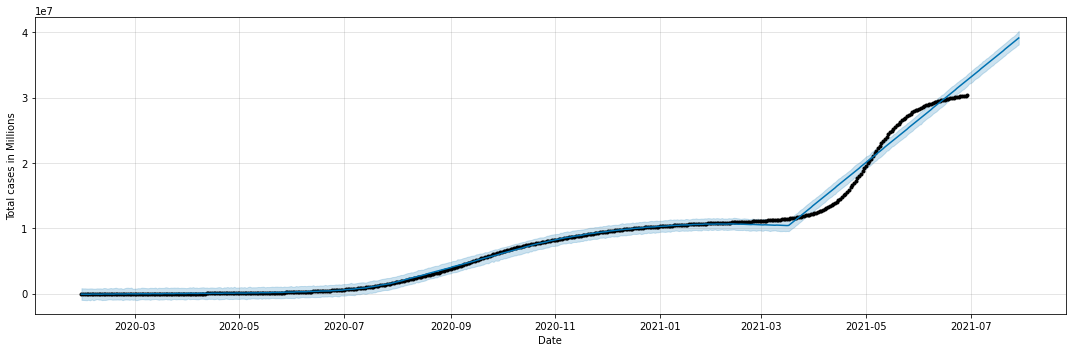

In [ ]:
model_india.plot(forecast_india,figsize=(15,5),xlabel='Date', ylabel='Total cases in Millions');

In [ ]:
india_fig=px.line(forecast_india,x="ds",y="yhat",title="India Forecasting",labels=dict(ds="Date", yhat="Number of Cases in Millions"))
india_fig.show()

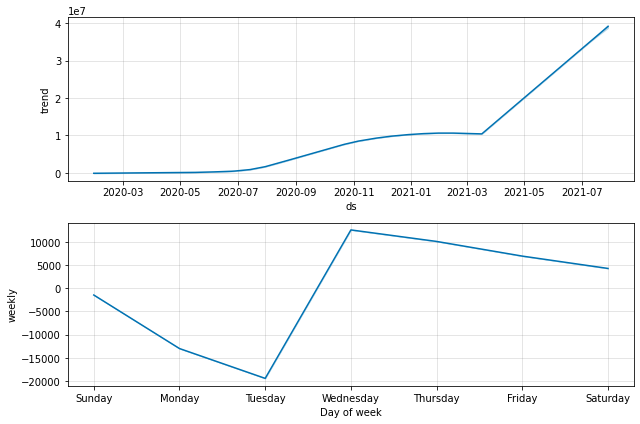

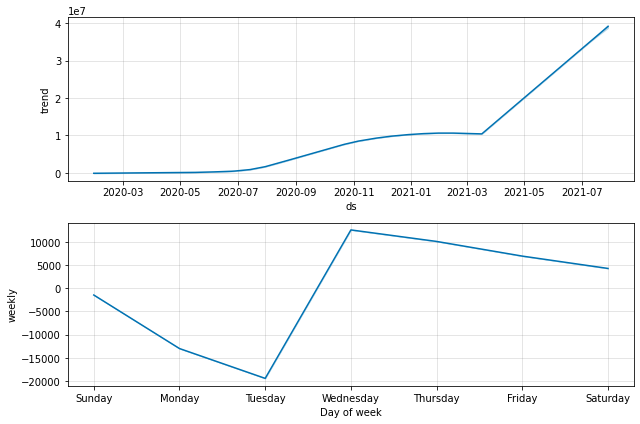

In [ ]:
model_india.plot_components(forecast_india)

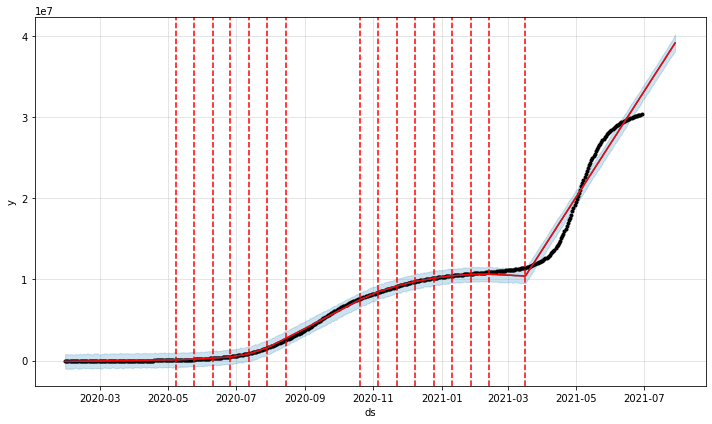

In [ ]:
fig = model_india.plot(forecast_india)
a = add_changepoints_to_plot(fig.gca(), model_india, forecast_india)

For The next 30 days, our model predicts that India will observe a steep increase in the no of total cases.

#USA

In [ ]:
model_usa = Prophet()
model_usa.fit(usa)
future_usa=model_usa.make_future_dataframe(periods=30)
forecast_usa = model_usa.predict(future_usa)
forecast_usa[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
550,2021-07-25,3.545399e+07,3.503446e+07,3.588498e+07
551,2021-07-26,3.548752e+07,3.501614e+07,3.594061e+07
552,2021-07-27,3.552663e+07,3.503992e+07,3.601277e+07
553,2021-07-28,3.558044e+07,3.507668e+07,3.609078e+07
554,2021-07-29,3.562731e+07,3.508449e+07,3.612498e+07


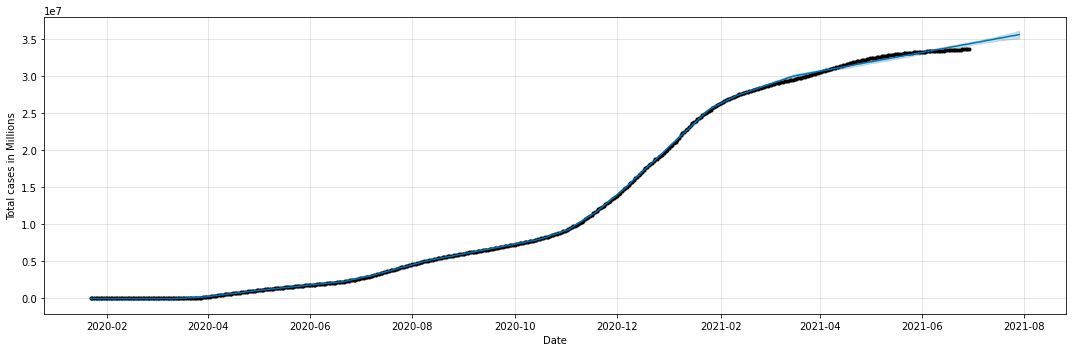

In [ ]:
model_usa.plot(forecast_usa,figsize=(15,5),xlabel='Date', ylabel='Total cases in Millions');

In [ ]:
usa_fig=px.line(forecast_usa,x="ds",y="yhat",title="United States Forecasting",labels=dict(ds="Date", yhat="Number of Cases in Millions"))
usa_fig.show()

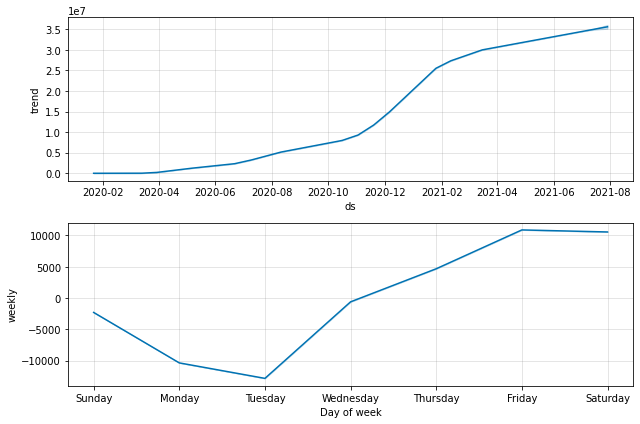

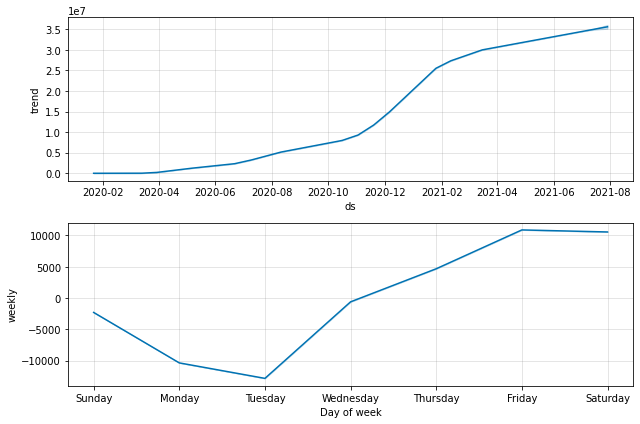

In [ ]:
model_usa.plot_components(forecast_usa)

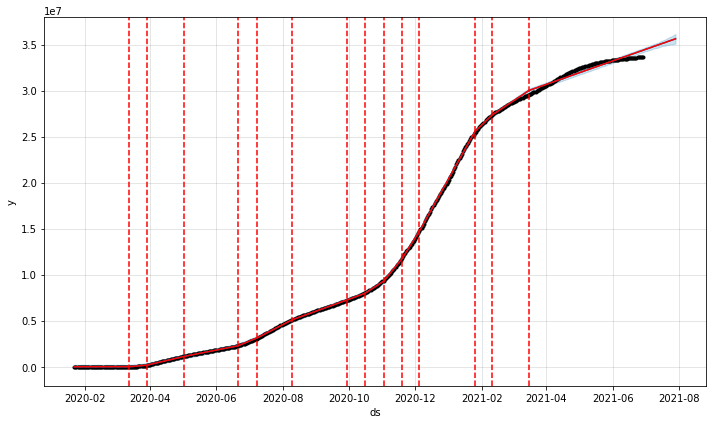

In [ ]:
fig = model_usa.plot(forecast_usa)
a = add_changepoints_to_plot(fig.gca(), model_usa, forecast_usa)

Our model predicts that for the next 30 days, United States will observe an increase in total cases

#Canada

In [ ]:
model_canada = Prophet()
model_canada.fit(canada)
future_canada=model_canada.make_future_dataframe(periods=30)
forecast_canada = model_canada.predict(future_canada)
forecast_canada[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
546,2021-07-25,1.660341e+06,1.631988e+06,1.689165e+06
547,2021-07-26,1.666065e+06,1.636102e+06,1.694830e+06
548,2021-07-27,1.671230e+06,1.643734e+06,1.700845e+06
549,2021-07-28,1.677824e+06,1.648917e+06,1.704424e+06
550,2021-07-29,1.683278e+06,1.651210e+06,1.712873e+06


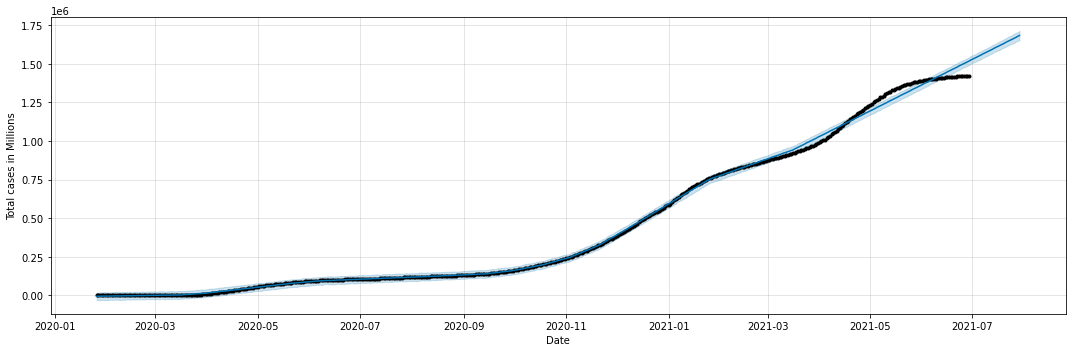

In [ ]:
model_canada.plot(forecast_canada,figsize=(15,5),xlabel='Date', ylabel='Total cases in Millions');

In [ ]:
canada_fig=px.line(forecast_canada,x="ds",y="yhat",title="Canada Forecasting",labels=dict(ds="Date", yhat="Number of Cases in Millions"))
canada_fig.show()

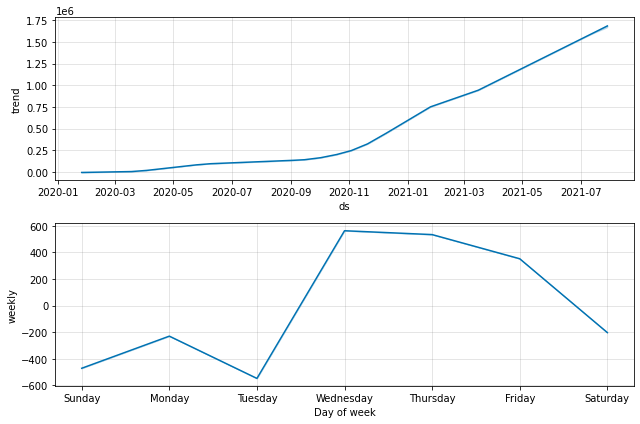

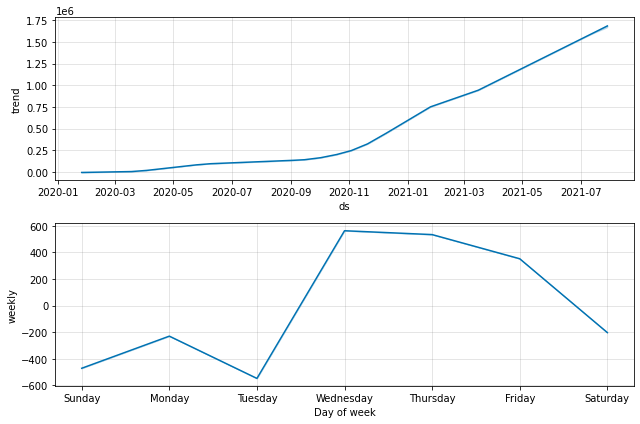

In [ ]:
model_canada.plot_components(forecast_canada)

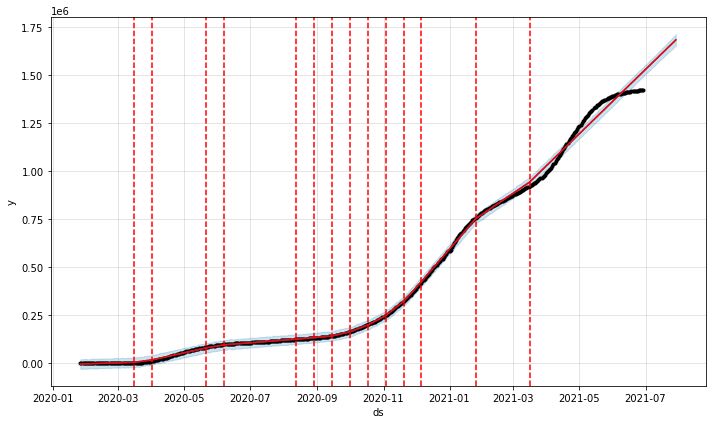

In [ ]:
fig = model_canada.plot(forecast_canada)
a = add_changepoints_to_plot(fig.gca(), model_canada, forecast_canada)

Our model predicts that that Canada will also experience a steep increase in the number of cases for the next 30 days.

#China

In [ ]:
model_china = Prophet()
model_china.fit(china)
future_china=model_china.make_future_dataframe(periods=30)
forecast_china = model_china.predict(future_china)
forecast_china[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
550,2021-07-25,92201.274388,89015.428221,95349.561250
551,2021-07-26,92162.585743,88925.026488,95380.796034
552,2021-07-27,92154.947231,88928.371327,95307.045545
553,2021-07-28,92195.687451,88698.563234,95852.729671
554,2021-07-29,92329.090321,88970.879563,95957.222707


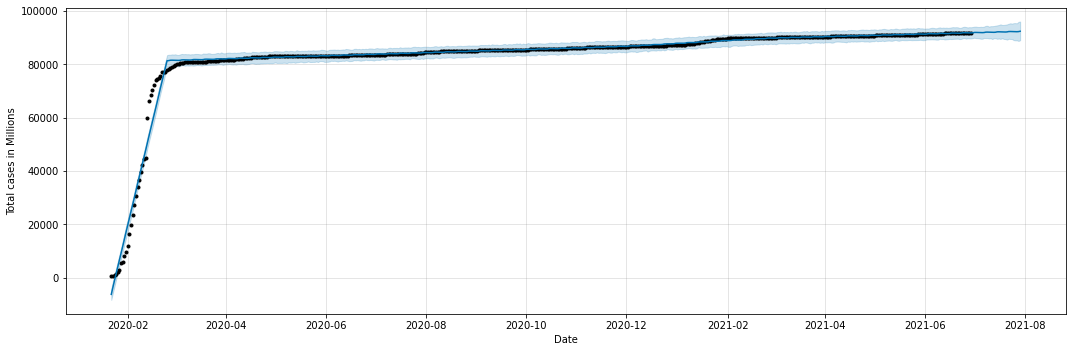

In [ ]:
model_china.plot(forecast_china,figsize=(15,5),xlabel='Date', ylabel='Total cases in Millions');

In [ ]:
china_fig=px.line(forecast_china,x="ds",y="yhat",title="China Forecasting",labels=dict(ds="Date", yhat="Number of Cases in Millions"))
china_fig.show()

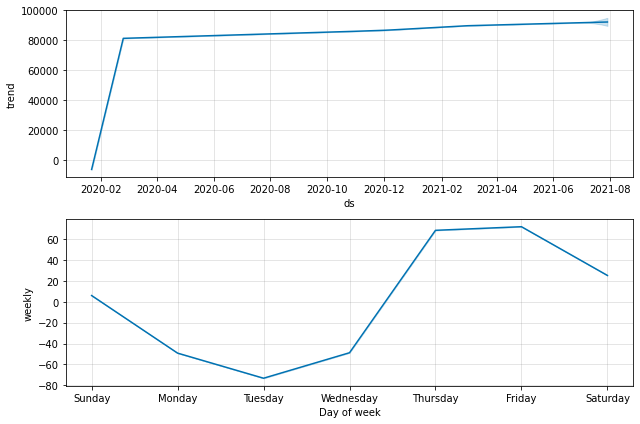

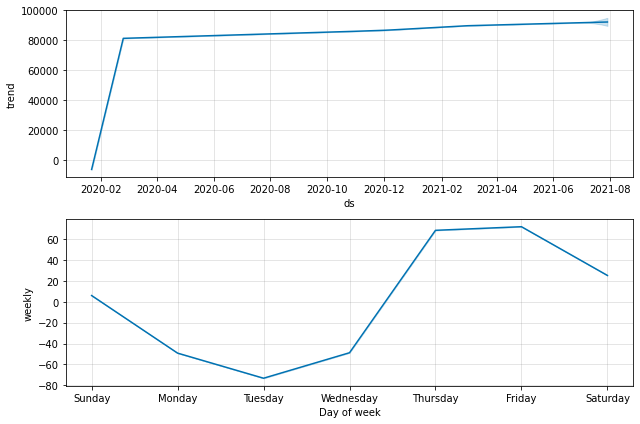

In [ ]:
model_china.plot_components(forecast_china)

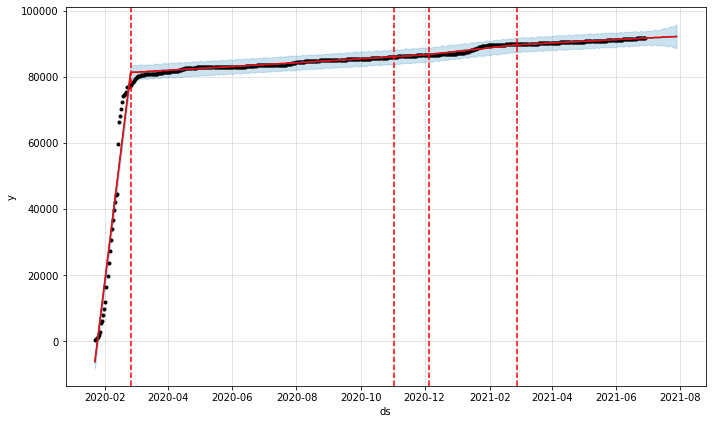

In [ ]:
fig = model_china.plot(forecast_china)
a = add_changepoints_to_plot(fig.gca(), model_china, forecast_china)

For China, Our model predicts that the for the next 30 days the no of Total cases will have no steep increase or decrease.

#United Kingdom

In [ ]:
model_uk = Prophet()
model_uk.fit(uk)
future_uk=model_uk.make_future_dataframe(periods=30)
forecast_uk = model_uk.predict(future_uk)
forecast_uk[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
541,2021-07-25,4.739753e+06,4.631497e+06,4.859512e+06
542,2021-07-26,4.742948e+06,4.627738e+06,4.868590e+06
543,2021-07-27,4.746334e+06,4.623006e+06,4.888254e+06
544,2021-07-28,4.748317e+06,4.617087e+06,4.886430e+06
545,2021-07-29,4.753049e+06,4.612862e+06,4.912475e+06


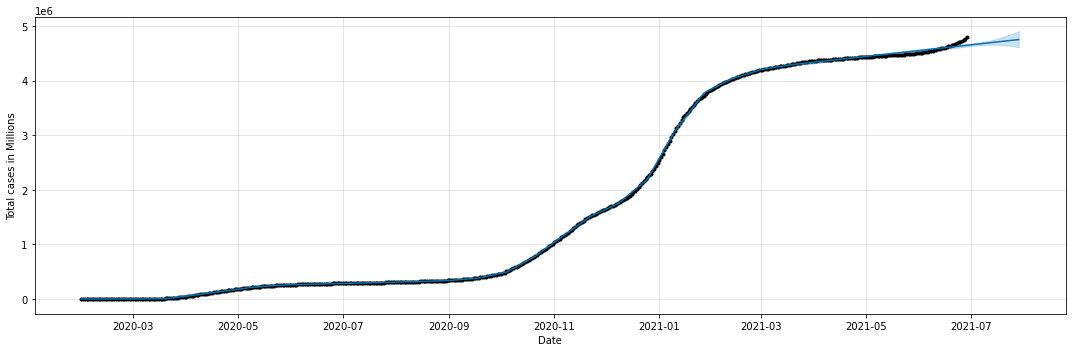

In [ ]:
model_uk.plot(forecast_uk,figsize=(15,5),xlabel='Date', ylabel='Total cases in Millions');

In [ ]:
uk_fig=px.line(forecast_uk,x="ds",y="yhat",title="United Kingdom Forecasting",labels=dict(ds="Date", yhat="Number of Cases in Millions"))
uk_fig.show()

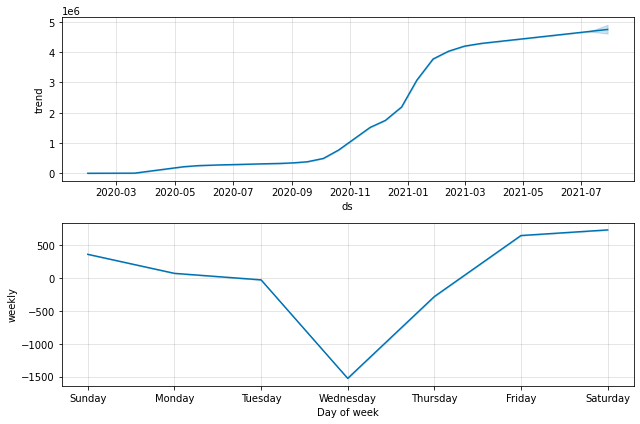

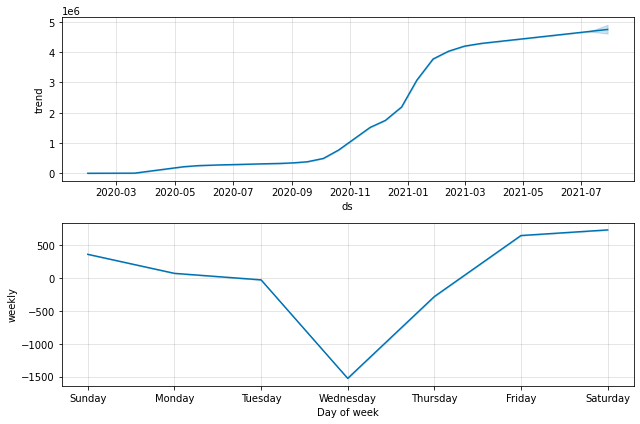

In [ ]:
model_uk.plot_components(forecast_uk)

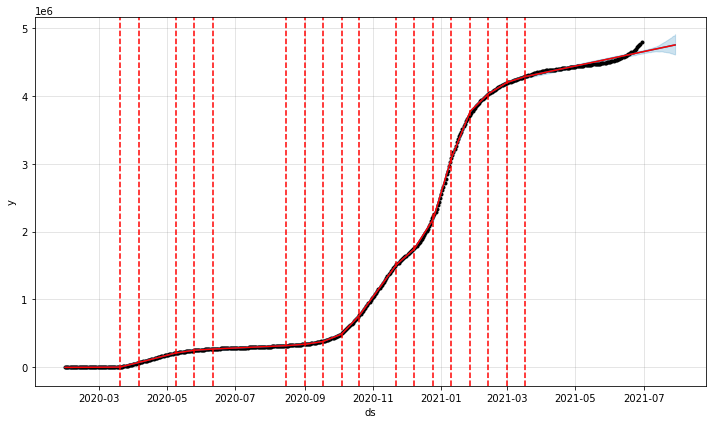

In [ ]:
fig = model_uk.plot(forecast_uk)
a = add_changepoints_to_plot(fig.gca(), model_uk, forecast_uk)

Our model Predicts that for UK, a slight increase in cases can be observed for the next 30 days